r^2 on train data is -3.7503841583867934
r^2 on test data is -0.44057854729727164
MSE for each target: [2.01948392e-28 6.25000000e-02 2.22729000e+01 2.22729000e+01]


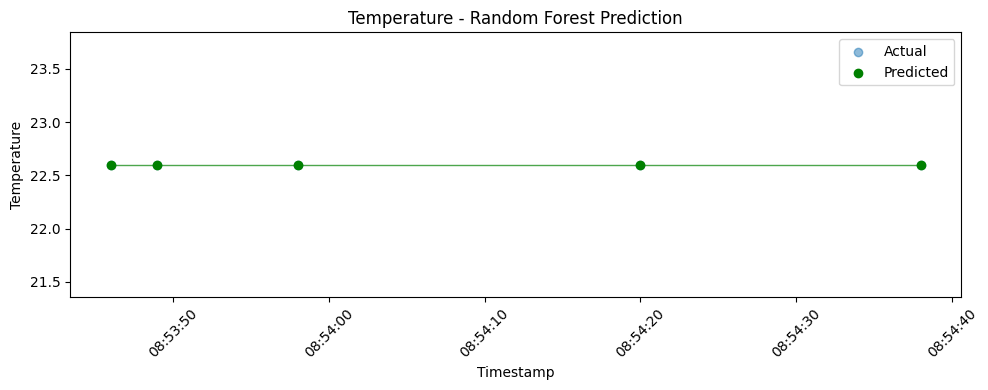

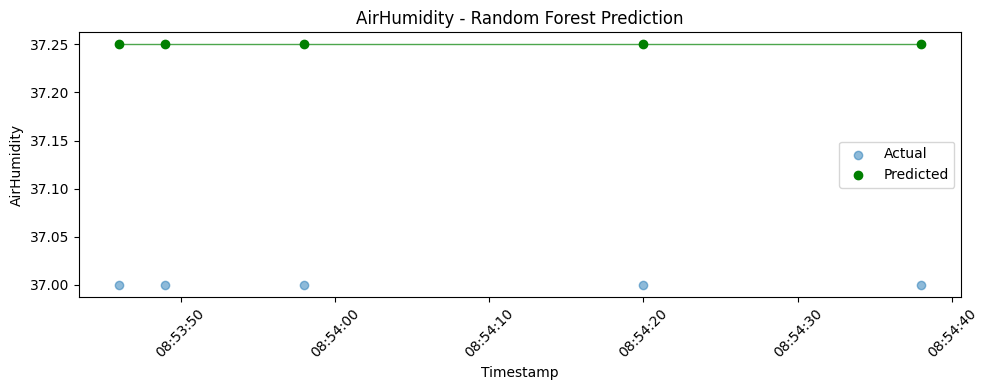

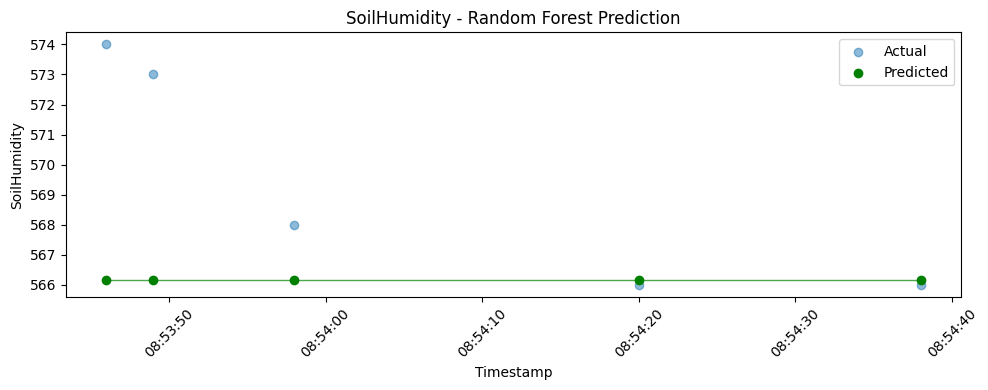

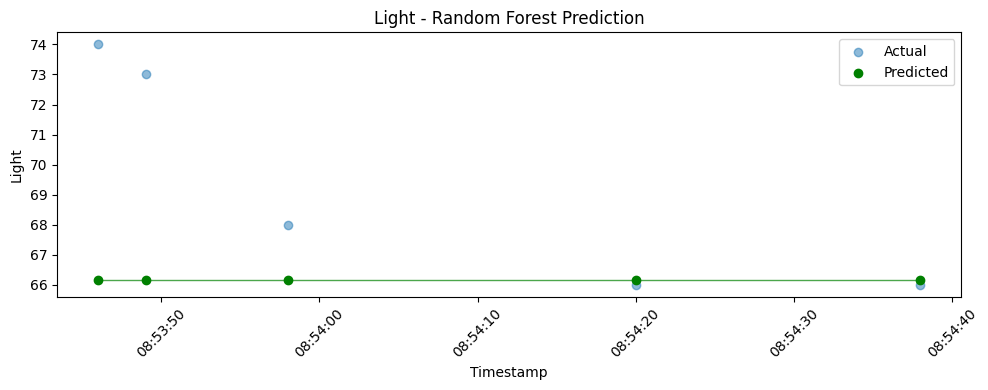

In [2]:
import sys
import os

ml_service_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if ml_service_root not in sys.path:
    sys.path.append(ml_service_root)

import matplotlib.pyplot as plt
import numpy as np
from ML.models.Measurement_models.measurement_randomForest import run_measurement_random_forest

model, X_test, y_test, y_pred, df = run_measurement_random_forest()

measurement_names = ["Temperature", "AirHumidity", "SoilHumidity", "Light"]
for i, name in enumerate(measurement_names):
    plt.figure(figsize=(10, 4))
    plt.scatter(df.loc[X_test.index, "Timestamp"], y_test.iloc[:, i], label="Actual", alpha=0.5)
    plt.scatter(df.loc[X_test.index, "Timestamp"], y_pred[:, i], color="green", label="Predicted")
    plt.plot(df.loc[X_test.index, "Timestamp"].sort_values(), 
             y_pred[:, i][np.argsort(df.loc[X_test.index, "Timestamp"])], 
             color="green", linewidth=1, alpha=0.7)
    plt.xlabel("Timestamp")
    plt.ylabel(name)
    plt.title(f"{name} - Random Forest Prediction")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()